In [57]:
from common.virtualGridMap import *
from numpy.linalg import matrix_rank,qr
from scipy.linalg import orth
import logging
from math import degrees

In [6]:
my_logger = logging.getLogger('MyLogger')
my_logger.setLevel(logging.DEBUG)
my_vmap = virtualGridMapLM(my_logger)

In [7]:
coords_LM = np.array(coords_LM)
coords_canvas = np.array(coords_canvas)
dims = coords_LM.shape
dims[1]

3L

In [8]:
coords_LM2 = np.array([])
coords_LM2.size

0

In [ ]:
np.mean(coords_LM,axis=0)

In [9]:
matrix_rank(coords_LM)

2

In [38]:
my_coords = coords_LM[(0,1,17),0:2]
print my_coords
print calibrationIDs[17]
matrix_rank(my_coords,1e-2)

print np.dot(my_coords[0],my_coords[1])

[[ 39.0373  23.6378]
 [ 39.0379  24.2353]
 [ 39.0436  23.0442]]
7I
2096.80338801


In [55]:
coords_canvas = coords_canvas[:,0:2]
Q,R = qr(coords_canvas.transpose())
print Q
A = orth(coords_canvas.transpose())
print A


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-0.60002792 -0.79997906]
 [-0.79997906  0.60002792]]


In [59]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    eps = np.finfo(np.float32).eps
    if(np.sum(np.linalg.norm(vector))<eps):
        return vector
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

90.0


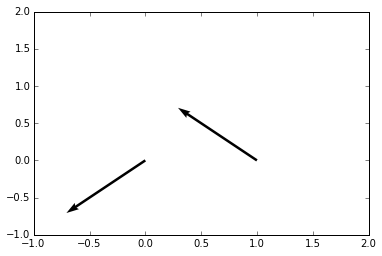

In [62]:
print degrees(angle_between(Q[0],Q[1]))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(Q[0],Q[1],angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-1,2])
ax.set_ylim([-1,2])
plt.draw()
plt.show()

In [ ]:
print degrees(angle_between(v0,v1))
print degrees(angle_between(v0,v2))
print degrees(angle_between(v0,v3))

In [ ]:
my_coords[0]
print unit_vector(v0)
print unit_vector(v1)
print unit_vector(v2)
print unit_vector(v3)

In [ ]:
A.transpose()

In [31]:
def collinear(p0, p1, p2):
    x1, y1 = p1[0] - p0[0], p1[1] - p0[1]
    x2, y2 = p2[0] - p0[0], p2[1] - p0[1]
    val = x1 * y2 - x2 * y1
    print val
    return abs(val) < 1e-2

In [36]:
my_coords = coords_LM[(0,1,17),0:2]
collinear(my_coords[0],my_coords[1],my_coords[2])

-0.00412041


True

In [39]:
my_coords

array([[ 39.0373,  23.6378],
       [ 39.0379,  24.2353],
       [ 39.0436,  23.0442]])

In [67]:
u,s,v = np.linalg.svd(coords_LM)

In [68]:
s

array([ 427.51204763,   18.08795013,    0.        ])

In [69]:
sum( np.where( s>1, 1, 0 ))

2

In [70]:
v

array([[-0.86009507, -0.51013377, -0.        ],
       [ 0.51013377, -0.86009507, -0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [71]:
print degrees(angle_between(v[0],v[1]))

90.0


In [72]:
print degrees(angle_between(v[0],[1,0]))

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)